In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [16]:
data = pd.read_csv('base_p4.csv', index_col=0)
data.head(5)

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
1,13.5,16.5,122.300003,109,12.0,12.0,1,1,1,0,4.691348,6.8125,0.0,2.602690
2,7.5,16.5,122.300003,133,6.0,12.0,2,1,0,0,4.890349,8.3125,0.0,2.014903
3,0.5,16.5,122.300003,129,NaN,12.0,2,0,0,0,4.859812,8.0625,0.0,-0.693147
4,15.5,16.5,122.300003,126,12.0,12.0,2,1,0,0,4.836282,7.8750,0.0,2.740840
5,27.5,16.5,122.300003,134,14.0,12.0,2,1,1,0,4.897840,8.3750,0.0,3.314186


# Diccionario de Datos:

- **faminc**: Ingreso familiar anual.
- **cigtax**: Impuesto al consumo de Cigarrillos
- **cigprice**: Precio del cigarillo
- **bwght**: Peso del bebé al nacer en onzas.
- **lbwght**: Peso del bebé al nacer en libras.
- **packs**: Paquetes de 10 cigarrillos.
- **male**: 1 Femenino, 0 Masculino.
- **motheduc**:  Años de escolaridad de la madre
- **fatheduc**: Años de escolaridad del padre.
- **cigs**: Numero de cigarrillos promedio que la madre fumó por día durante el embarazo.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 1 to 1388
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   faminc    1388 non-null   float64
 1   cigtax    1388 non-null   float64
 2   cigprice  1388 non-null   float64
 3   bwght     1388 non-null   int64  
 4   fatheduc  1192 non-null   float64
 5   motheduc  1387 non-null   float64
 6   parity    1388 non-null   int64  
 7   male      1388 non-null   int64  
 8   white     1388 non-null   int64  
 9   cigs      1388 non-null   int64  
 10  lbwght    1388 non-null   float64
 11  bwghtlbs  1388 non-null   float64
 12  packs     1388 non-null   float64
 13  lfaminc   1388 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 162.7 KB


In [18]:
data.isnull().sum()

faminc        0
cigtax        0
cigprice      0
bwght         0
fatheduc    196
motheduc      1
parity        0
male          0
white         0
cigs          0
lbwght        0
bwghtlbs      0
packs         0
lfaminc       0
dtype: int64

In [19]:
def plot_histograms(data):
    for column in data.columns:
        plt.figure(figsize=(8, 6))
        data[column].hist()
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.show()

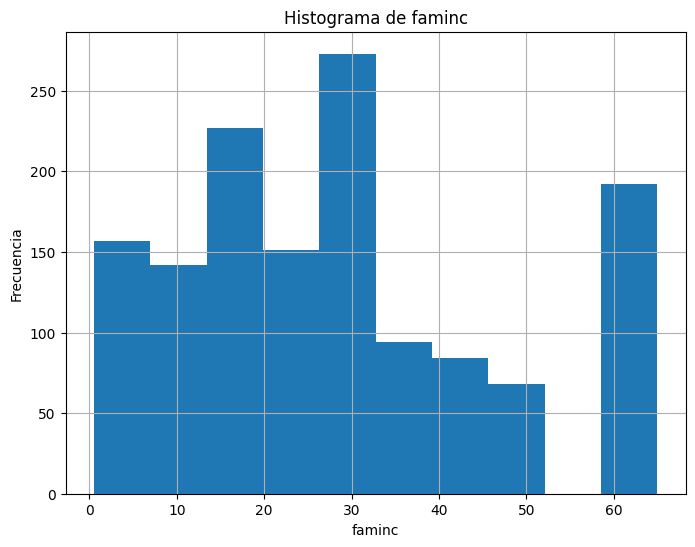

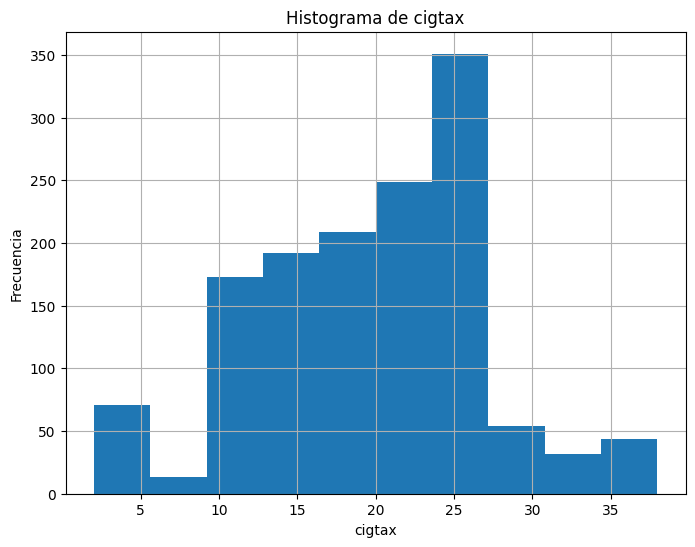

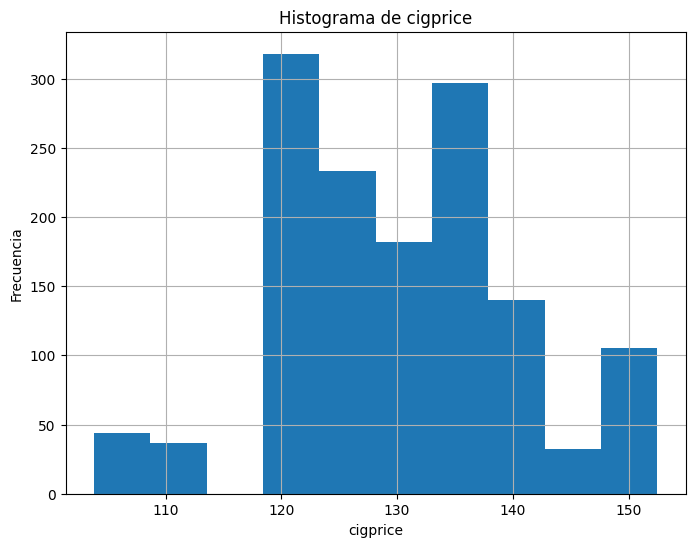

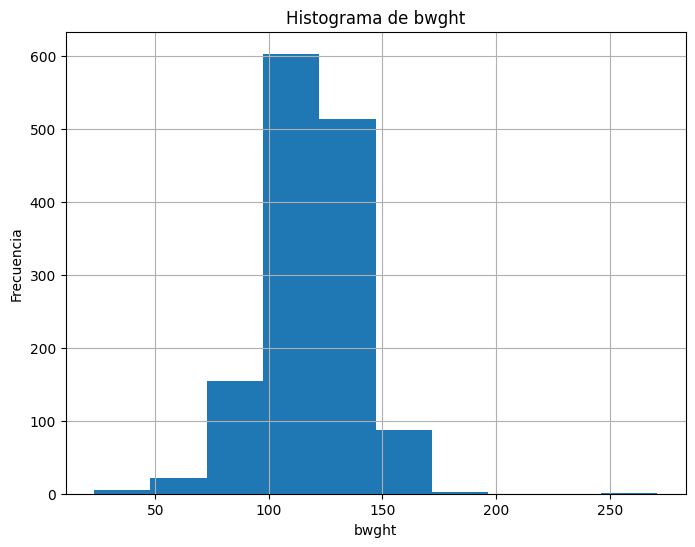

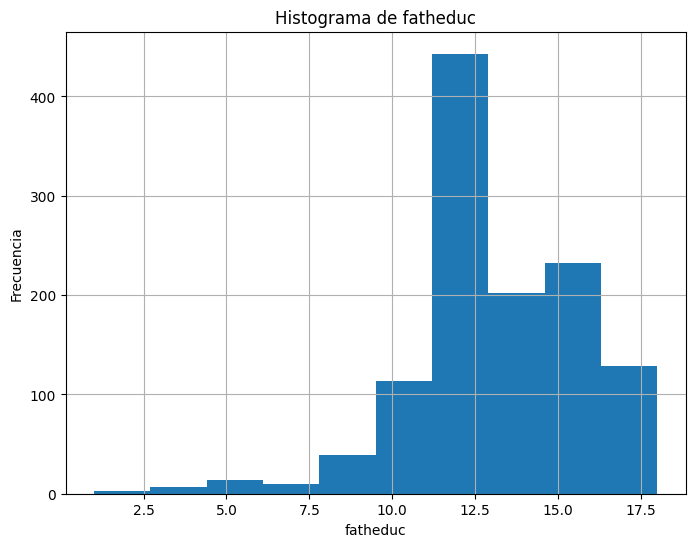

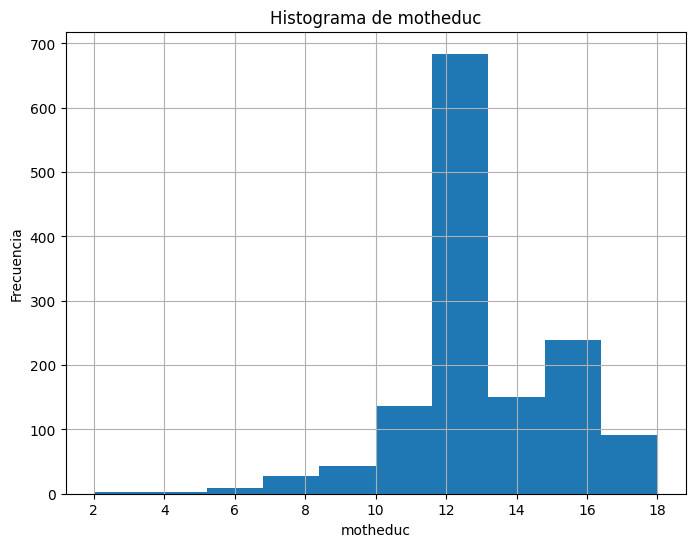

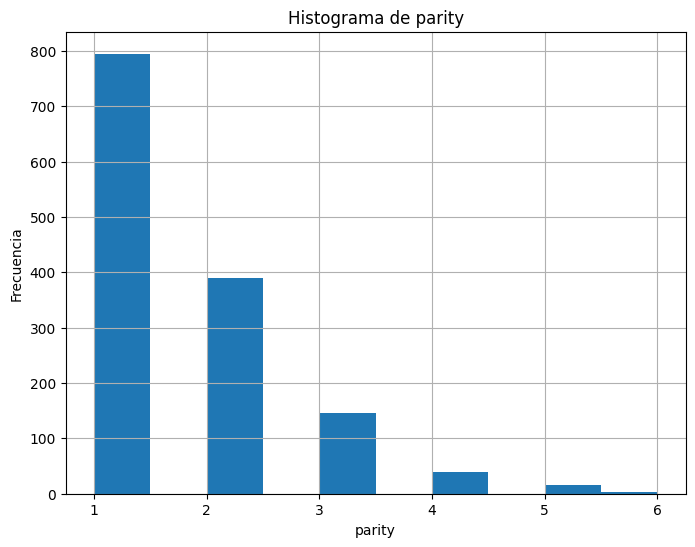

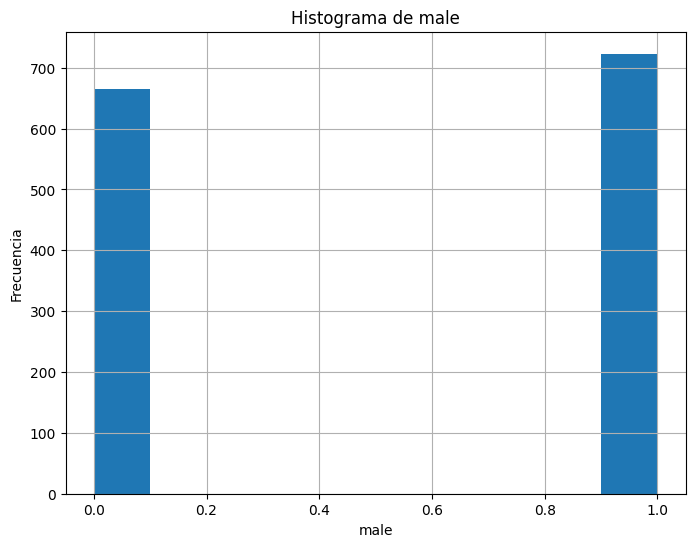

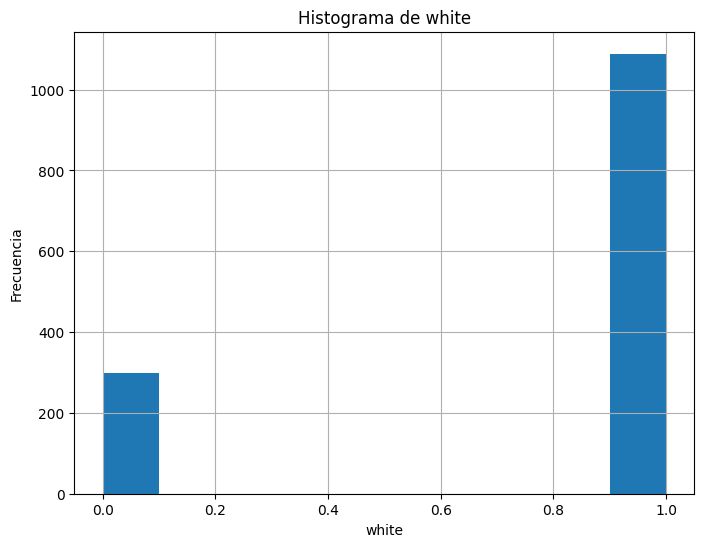

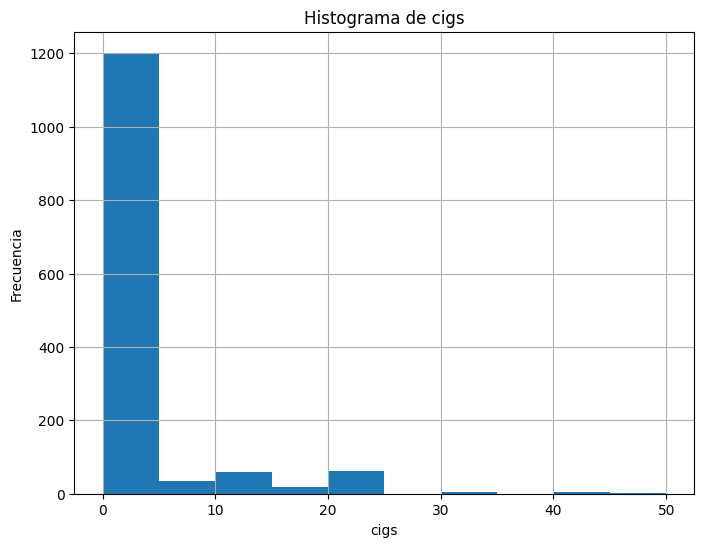

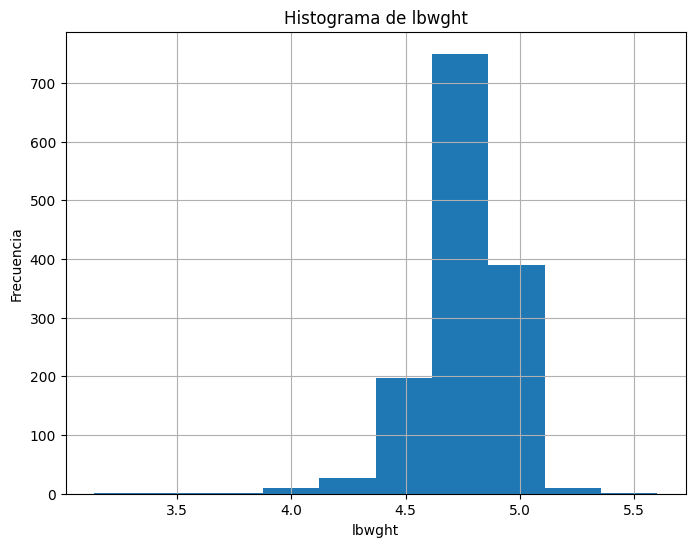

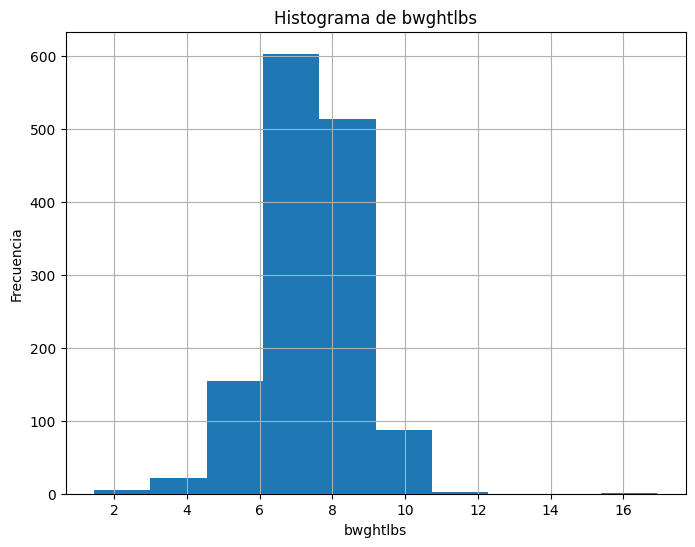

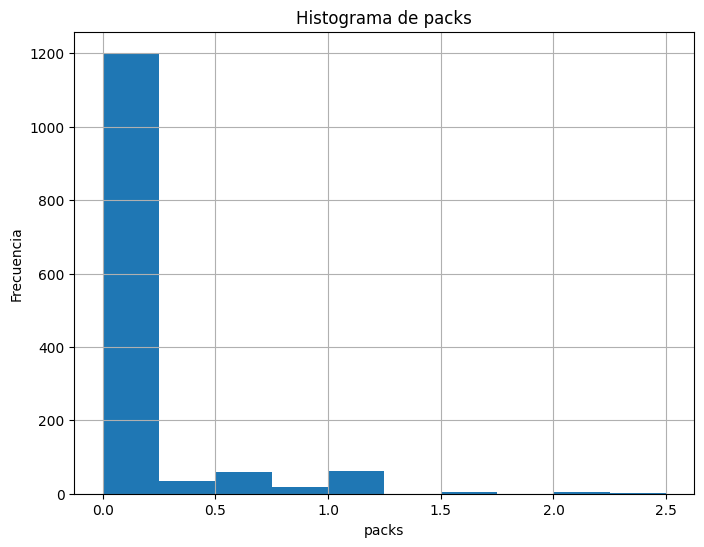

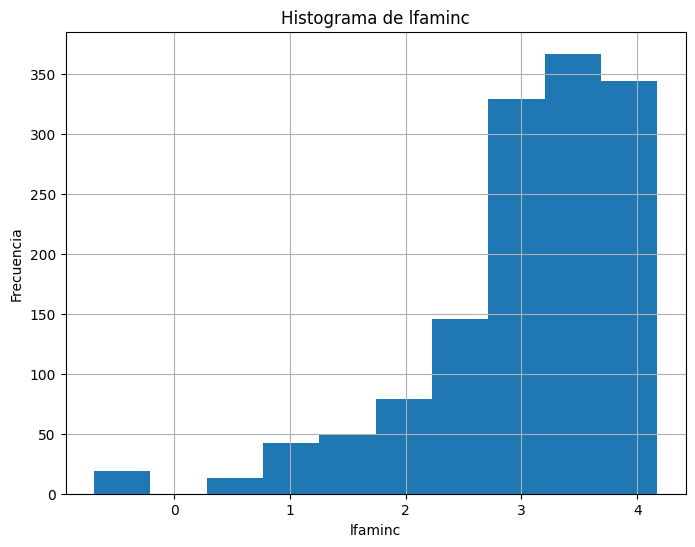

In [20]:
plot_histograms(data)

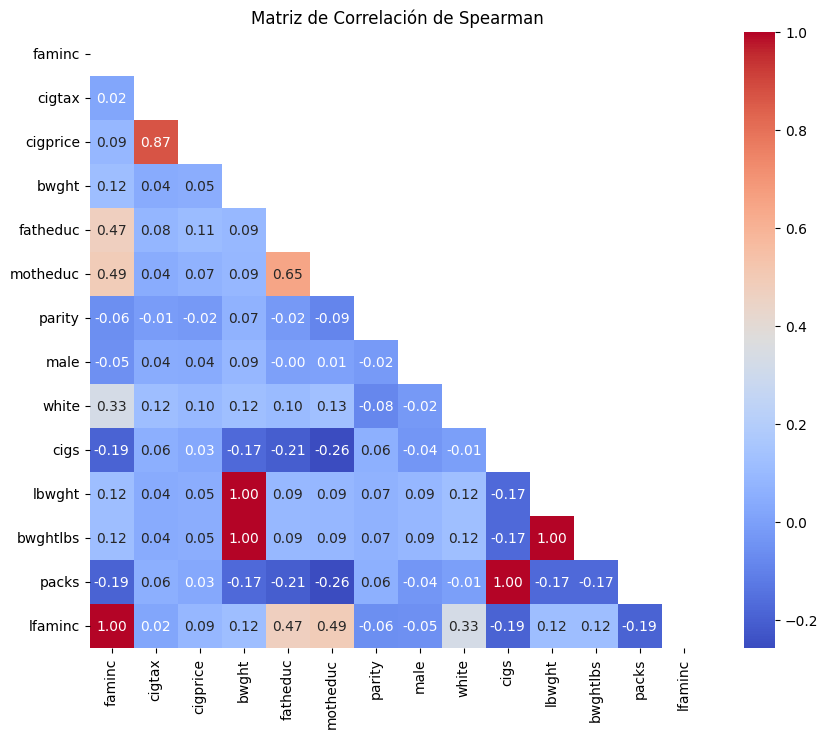

In [22]:
def spearman_correlation_matrix(dataframe):
    # Seleccionar solo las columnas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64'])

    # Calcular la matriz de correlación de Spearman
    spearman_corr_matrix = numeric_columns.corr(method='spearman')

     # Crear una máscara para mostrar solo la mitad inferior de la matriz
    mask = np.triu(np.ones_like(spearman_corr_matrix, dtype=bool))

    # Crear el mapa de calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(spearman_corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title('Matriz de Correlación de Spearman')
    plt.show()

spearman_correlation_matrix(data)